Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset

In [2]:
data = pd.read_csv("C:/Users/Ammu/Downloads/Wine_clust.csv")
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Check for missing values and Scale the data Using Standard scaler

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
# no null values

In [5]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the features
sc_data = scaler.fit_transform(data)
sc_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## 1. KMeans Clustering

C:\Users\Ammu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


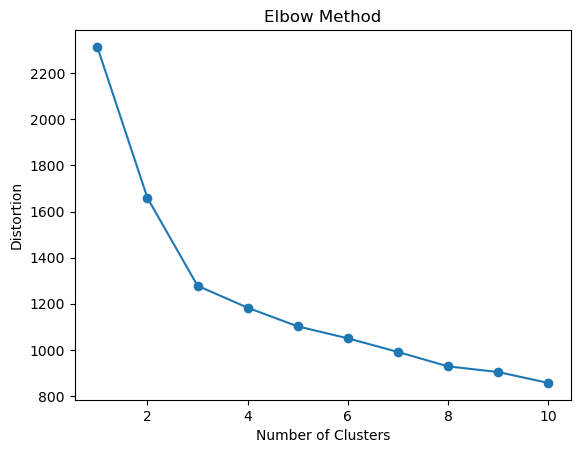

In [7]:
from sklearn.cluster import KMeans

# assigned an empty array for possible cluster values
distortion = [] 
max_clusters = 10

# for each value, fit the data and check for inertia
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sc_data)
    distortion.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), distortion, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

The graph returns an optimal count of n=3

In [8]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(sc_data)

# Get the cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print the cluster labels and centroids
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 2. Agglomerative Clustering

In [9]:
from sklearn.cluster import AgglomerativeClustering

#Performing the agglomerative clustering
clusters= AgglomerativeClustering(n_clusters=3).fit(sc_data)

# print the class labels
print(clusters.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


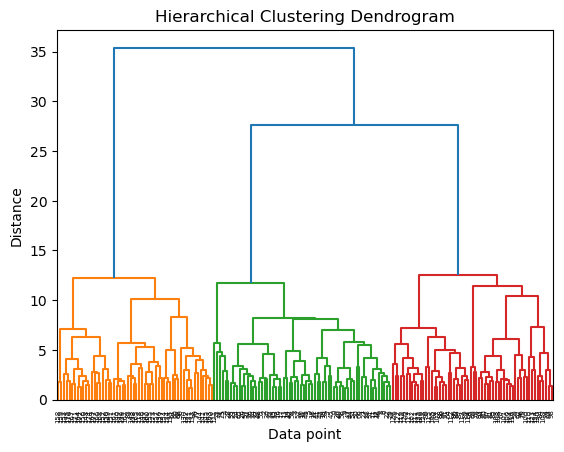

In [10]:
# Plot a dendrogram to visualise the 3 clusters.
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(sc_data, 'ward')

# Plot dendrogram
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Here too, the optimal number of clusters is n=3

## 3. Affinity Propagation Clustering

In [11]:
from sklearn.cluster import AffinityPropagation

# preference parameter
pref = -50

# Perform Affinity Propagation clustering
prop = AffinityPropagation(preference=pref)
prop.fit(sc_data)

# Get the cluster labels and cluster centers (exemplars)
labels = prop.labels_
centers = prop.cluster_centers_

# Print the cluster labels and cluster centers
print("Cluster Labels:")
print(labels)
print()
print("Cluster Centers (Exemplars):")
print(centers)

Cluster Labels:
[0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 4 0 1 1 1 5 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 4 3 7 4 4 3 1 4 4 7 2 7 1 5 1
 1 4 4 7 2 5 4 4 3 6 5 4 3 3 3 3 3 3 3 4 4 2 5 4 4 4 4 4 5 4 4 3 3 3 4 5 2
 5 3 3 5 4 4 5 7 3 5 5 5 5 5 5 5 3 5 3 7 7 7 7 6 6 7 6 7 7 7 7 7 7 7 7 7 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 6 6 6 6 6 6 7 6 6 6 6 6 6 6]

Cluster Centers (Exemplars):
[[ 1.48155459 -0.51736664  0.30515936 -1.28970717  0.86070511  1.56209322
   1.36612798 -0.17609475  0.66421706  0.73186953  0.40605066  0.33660575
   2.23903902]
 [ 0.59216382 -0.47248348  0.15894572  0.30180329  0.01814502  0.64876424
   0.95450162 -0.82071924  0.47148781  0.01812906  0.36217728  1.2123203
   0.55125733]
 [-0.82839089 -1.20856726 -1.5225111  -1.40982117  2.54582528 -0.633101
  -0.17998078 -0.09551669  2.04836353 -0.71723991  0.44992405 -0.42611337
   0.0098934 ]
 [-1.68072372 -0.2480677   0.34171277  0.63211678 -1.10526843 -0.55298442
  -0.34061545  0.9519981  -0.422

## 3. DBSCAN method

In [12]:
from sklearn.cluster import DBSCAN
# perform the DBSCAN
labels = DBSCAN(eps=1.5, min_samples=3).fit_predict(sc_data)

# Collect data points for each cluster
clusters = [sc_data[labels == label] for label in np.unique(labels) if label != -1]

# Print the clusters
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}:")
    print(cluster)
    print()

Cluster 1:
[[ 0.77745356 -0.47248348  1.21899459 -0.68913719  0.86070511  0.88911397
   0.88422395 -0.49840699 -0.22934584  0.96978302  1.41513857  0.37897904
   1.79320989]
 [ 1.60508109 -0.37374054  1.29210141  0.15166079  1.42241183  0.80899739
   1.1151363  -0.25667281  0.66421706  0.49395604  0.49379744  0.05411719
   1.69767508]
 [ 1.02450655 -0.68792264  0.92656731  0.15166079  1.07134513  1.04934713
   1.37616764  0.30737361  0.22619603  0.66698403  0.75703776 -0.05887823
   1.22000102]
 [ 0.48098997 -0.50839001  0.92656731 -1.01945068 -0.47334836  0.88911397
   0.91434295 -0.17609475 -0.24686669 -0.11164194 -0.16430337  0.8592096
   1.42699311]
 [ 0.95039066 -0.3916938   1.14588777 -0.71916569  1.07134513  1.1294637
   0.76374794  0.22679555  0.15611266  0.53721304  0.75703776  0.44960118
   2.00020199]
 [ 0.35746347 -0.32885738  1.14588777 -0.80925118  0.1585717   1.1294637
   1.2054933  -0.41782893  0.12107098  0.40744204  0.49379744  0.32248133
   1.66583014]]

Cluster 2:
[